Basic notebook to generate most of plots found in the main publication.

In [ ]:
import sys

IN_COLAB = 'google.colab' in sys.modules
REPO_DIR = '..' if IN_COLAB  else '..'

# Imports

In [1]:
import IPython.display
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import patches
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style('ticks')
sns.set_context('talk', font_scale=1.5)
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['savefig.dpi'] = 72
matplotlib.rcParams['savefig.pad_inches'] = 0.0
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['axes.linewidth'] = 2.5
matplotlib.rcParams['legend.markerscale'] = 2.0
matplotlib.rcParams['legend.fontsize'] = 'small'
# Make colab/jupyter plots HD.
IPython.display.set_matplotlib_formats('retina')

# Helper functions

In [3]:
task_names = ['benzene', 'logic7', 'logic8', 'logic10', 'crippen', 'bashapes', 'bacommunity', 'treegrid']
model_names = ['gcn', 'mpnn', 'graphnet', 'gat']
att_model_names = ['GradInput', 'SmoothGrad(GradInput)', 'GradCAM-last', 'GradCAM-all', 'IG', 'CAM', 'AttWeights']

In [4]:
task_to_att_key = {
    'crippen': ('tau', 'ATT tau'),
    'benzene': ('AUROC', 'ATT AUROC'),
    'logic7': ('AUROC', 'ATT AUROC'),
    'logic8': ('AUROC', 'ATT AUROC'),
    'logic10': ('AUROC', 'ATT AUROC'),
    'bashapes': ('ACC', 'ATT AUROC'),
    'bacommunity': ('ACC', 'ATT AUROC'),
    'treegrid': ('AUROC', 'ATT AUROC')
}

In [73]:
nicenames = {
    'ACC': 'Accuracy',
    'ATT AUROC': 'Attribution auROC',
    'ATT tau': 'Attribution Kendall $\\tau$',
    'ATT r': 'Attribution Pearson $r$',
    'AttWeights': 'Attention Weights',
    'bashapes': 'BA-Shapes',
    'bacommunity': 'BA-Community',
    'treegrid': 'Tree-Grid',
    'graphnet': 'GraphNets',
    'gcn': 'GCN',
    'mpnn': 'MPNN',
    'gat': 'GAT',
    'block_type': '',
    'Technique': '',
    'SmoothGrad(GradInput)': 'SmoothGrad(GI)',
    'l2_reg': 'L2 Reg. Coeff.',
    '(amine & ether2 & benzene)': 'Amine AND Ether AND Benzene',
    '(flouride & carbonyl)': 'Fluoride AND Carbonyl',
    '(unbranched alkane & carbonyl)': 'Unbranched Alkane AND Carbonyl',
    'Random': 'Random Baseline',
    'benzene': 'Benzene',
    'logic7': 'Fluoride AND Carbonyl',
    'logic8': 'Unbranched Alkane AND Carbonyl',
    'logic10': 'Amine AND Ether AND Benzene',
    'crippen': 'CrippenLogP'
}


def get_nicename(x):
  if x in nicenames.keys():
    return nicenames[x]
  else:
    return x


def plot_nice_legend(ax=None):
  if ax is None:
    legend = plt.legend(bbox_to_anchor=(1, 1), frameon=False)
  else:
    legend = ax.legend(bbox_to_anchor=(1, 1), frameon=False)
  for t in legend.get_texts():
    t.set_text(get_nicename(t.get_text()))


def label_nicenames(ax=None):
  if ax is None:
    ax = plt.gca()
  ax.set_xlabel(get_nicename(ax.get_xlabel()))
  ax.set_ylabel(get_nicename(ax.get_ylabel()))
  ax.set_xticklabels(
      [get_nicename(x.get_text()) for x in ax.get_xticklabels()])

# Specify path of all CSV files

In [39]:
csv_path = os.path.join(REPO_DIR, 'data', 'results')

# Figure 3: Attribution method accuracy across tasks and model architectures

For here and below, the attribution of logic-based classification tasks, `[benzene, logic7, logic8, logic8]` are assessed using AUROC, whereas the regression task, `crippen`, is assessed using Kendall's tau.

In [40]:
viz_file_name = 'F3_hparams_summary.csv'
path = os.path.join(csv_path, viz_file_name)
three_df = pd.read_csv(path)
three_df.iloc[[0, -1]]

,task_type,block_type,Technique,ATT AUROC,ATT tau
0,benzene,gcn,GradInput,0.737902,NaN
2678,treegrid,gat,Random,0.624766,NaN


In [41]:
tabledf = []
for task in task_names:
  attr_metric = task_to_att_key[task][-1]

  for model in model_names:
    for att_model in att_model_names + ['Random']:
      idx = (three_df.block_type == model) & \
            (three_df.task_type == task) & \
            (three_df.Technique == att_model)
      mean = three_df[attr_metric][idx].mean()

      res = {
          'Model': get_nicename(model),
          'Attribution Model': get_nicename(att_model),
          'Task': get_nicename(task),
          'Attribution Performance': np.round(mean, 2)
      }
      tabledf.append(res)
tabledf = pd.DataFrame(tabledf)

In [42]:
dispdf = tabledf.pivot_table(
    index='Attribution Model',
    columns=('Task', 'Model'),
    values='Attribution Performance',
    aggfunc=lambda x: x)

dispdf = dispdf.reindex(columns=[get_nicename(n) for n in task_names], level='Task')\
               .reindex(columns=[get_nicename(m) for m in model_names], level='Model')\
               .reindex(index=[get_nicename(m) for m in ['Random'] + att_model_names])\
               .rename_axis(None)
dispdf

Task              Benzene                       Fluoride AND Carbonyl        \
Model                 GCN  MPNN GraphNets   GAT                   GCN  MPNN   
Random Baseline      0.61  0.61      0.61  0.61                  0.42  0.42   
GradInput            0.72  0.54      0.54  0.56                  0.56  0.55   
SmoothGrad(GI)       0.71  0.54      0.54  0.53                  0.58  0.57   
GradCAM-last         0.74  0.72      0.66  0.66                  0.64  0.74   
GradCAM-all          0.75  0.68      0.84  0.62                  0.60  0.71   
IG                   0.97  0.89      0.94  0.95                  0.77  0.76   
CAM                  0.98  0.96      0.76  0.99                  0.74  0.73   
Attention Weights     NaN   NaN       NaN  0.51                   NaN   NaN   

Task                              Unbranched Alkane AND Carbonyl        ...  \
Model             GraphNets   GAT                            GCN  MPNN  ...   
Random Baseline        0.42  0.43                           0.50  0.50  ...   
GradInput              0.57  0.56                           0.56  0.55  ...   
SmoothGrad(GI)         0.61  0.56                           0.55  0.56  ...   
GradCAM-last           0.43  0.60                           0.64  0.93  ...   
GradCAM-all            0.74  0.57                           0.59  0.77  ...   
IG                     0.76  0.74                           0.82  0.78  ...   
CAM                    0.45  0.66                           0.91  0.97  ...   
Attention Weights       NaN  0.53                            NaN   NaN  ...   

Task              BA-Shapes       BA-Community                        \
Model             GraphNets   GAT          GCN  MPNN GraphNets   GAT   
Random Baseline        0.27  0.27         0.38  0.38      0.38  0.38   
GradInput              0.39  0.72         0.52  0.51      0.50  0.50   
SmoothGrad(GI)         0.39  0.72         0.52  0.51      0.51  0.49   
GradCAM-last           0.86  0.80         0.70  0.67      0.68  0.61   
GradCAM-all            0.65  0.76         0.67  0.71      0.73  0.57   
IG                      NaN   NaN         0.81  0.75      0.72  0.62   
CAM                     NaN   NaN          NaN   NaN       NaN   NaN   
Attention Weights       NaN  0.50          NaN   NaN       NaN  0.50   

Task              Tree-Grid                        
Model                   GCN  MPNN GraphNets   GAT  
Random Baseline        0.62  0.62      0.62  0.62  
GradInput              0.65  0.71      0.66  0.67  
SmoothGrad(GI)         0.65  0.71      0.66  0.67  
GradCAM-last           0.70  0.77      0.81  0.70  
GradCAM-all            0.68  0.70      0.67  0.68  
IG                      NaN   NaN       NaN   NaN  
CAM                     NaN   NaN       NaN   NaN  
Attention Weights       NaN   NaN       NaN  0.49  

[8 rows x 32 columns]

Table 1: Benzene, 'Amine AND Ether AND Benzene', 'CrippenLogP'

In [43]:
table1_df = tabledf[tabledf['Task'].isin(['Benzene', 'Amine AND Ether AND Benzene', 'CrippenLogP'])]

In [44]:
dispdf = table1_df.pivot_table(
    index='Attribution Model',
    columns=('Task', 'Model'),
    values='Attribution Performance',
    aggfunc=lambda x: x)

dispdf = dispdf.reindex(columns=[get_nicename(n) for n in task_names], level='Task')\
               .reindex(columns=[get_nicename(m) for m in model_names], level='Model')\
               .reindex(index=[get_nicename(m) for m in ['Random'] + att_model_names])\
               .rename_axis(None)
dispdf

Task              Benzene                       Amine AND Ether AND Benzene  \
Model                 GCN  MPNN GraphNets   GAT                         GCN   
Random Baseline      0.61  0.61      0.61  0.61                        0.50   
GradInput            0.72  0.54      0.54  0.56                        0.52   
SmoothGrad(GI)       0.71  0.54      0.54  0.53                        0.51   
GradCAM-last         0.74  0.72      0.66  0.66                        0.54   
GradCAM-all          0.75  0.68      0.84  0.62                        0.54   
IG                   0.97  0.89      0.94  0.95                        0.69   
CAM                  0.98  0.96      0.76  0.99                        0.75   
Attention Weights     NaN   NaN       NaN  0.51                         NaN   

Task                                    CrippenLogP                        
Model              MPNN GraphNets   GAT         GCN  MPNN GraphNets   GAT  
Random Baseline    0.50      0.50  0.50        0.13  0.13      0.13  0.13  
GradInput          0.53      0.55  0.41        0.12  0.09      0.13  0.10  
SmoothGrad(GI)     0.55      0.59  0.38        0.15  0.11      0.15  0.11  
GradCAM-last       0.74      0.55  0.46        0.04  0.33      0.24  0.07  
GradCAM-all        0.62      0.70  0.44        0.05  0.27      0.27  0.09  
IG                 0.59      0.72  0.54        0.31  0.24      0.24  0.27  
CAM                0.76      0.60  0.65        0.20  0.37      0.28  0.23  
Attention Weights   NaN       NaN  0.51         NaN   NaN       NaN -0.06

In [45]:
top = cm.get_cmap('Oranges', 128)
middle = [[1, 1, 1, 1]]
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, int(np.round(0.34 * 256)))),
                       np.repeat(middle, int(np.round(0.16 * 256)), axis=0),
                       bottom(np.linspace(0, 1, int(np.round(0.5 * 256))))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

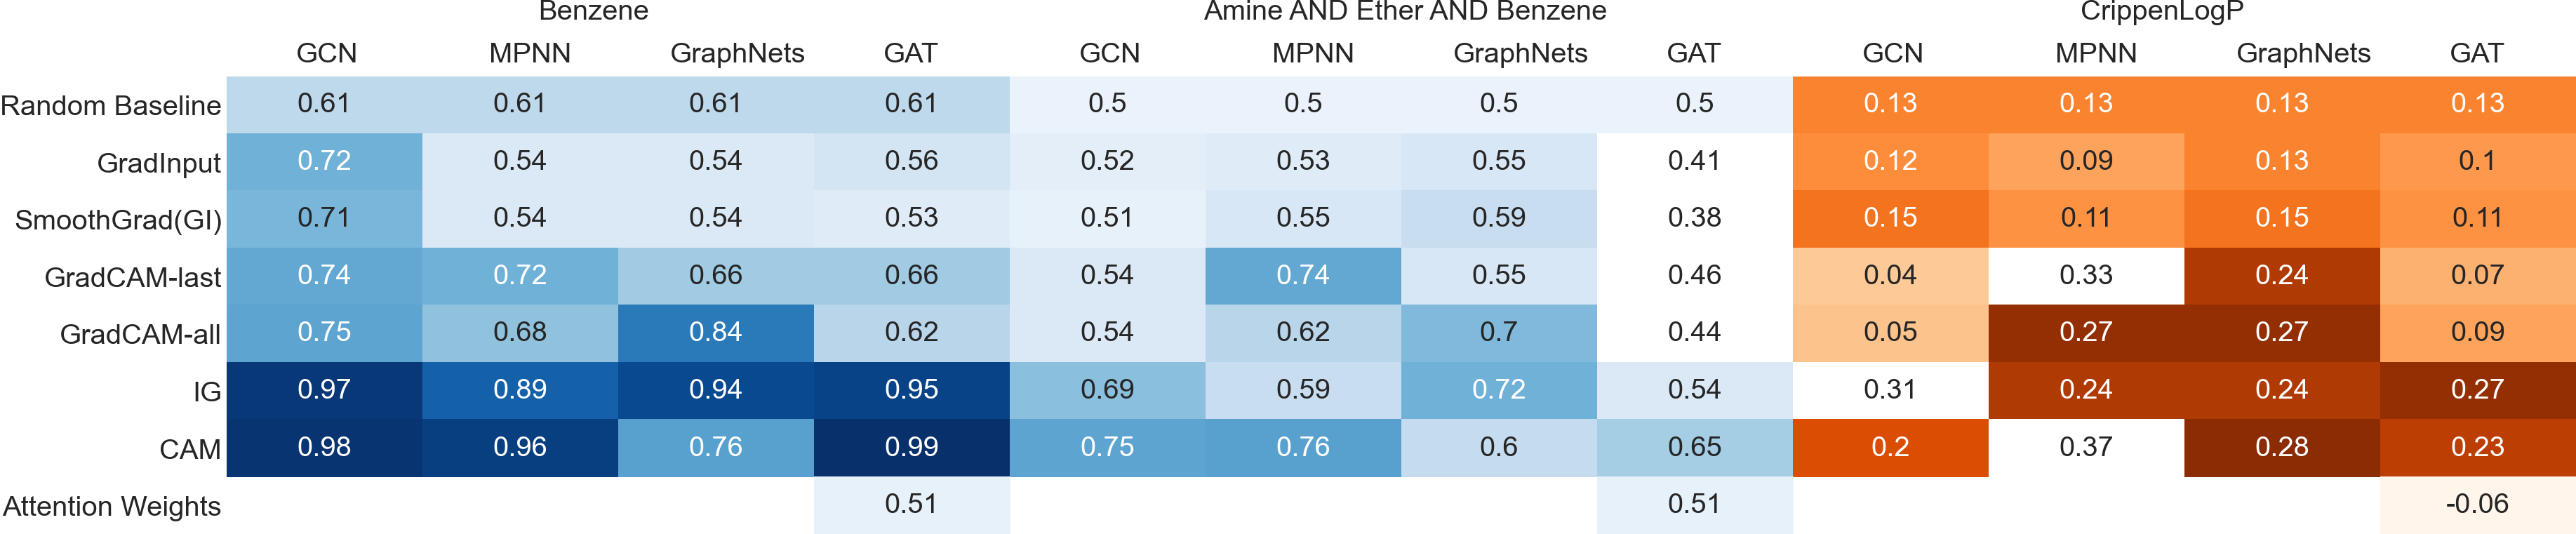

In [46]:
fig = plt.figure(figsize=(30, 6))
ax = sns.heatmap(dispdf, cmap=newcmp, annot=True, ax=plt.gca(), cbar=False)
ax.xaxis.tick_top()
ax.tick_params(length=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)

for i, t in enumerate(ax.get_xticklabels()):
  pos = t.get_position()
  text = t.get_text()
  task, model = text.split('-')
  plt.text(i + 0.4 - len(model) * .015, -.25, model, fontsize=20)
  if i % 4 == 1:
    plt.text(i + 0.8 - len(task) * .03, -1, task, fontsize=20)

ax.set_xticklabels([]);
plt.xlabel('');

Table 2: BA-shapes, BA-community, Tree-Grid 

In [47]:
table2_df = tabledf[tabledf['Task'].isin(['BA-Shapes', 'BA-Community', 'Tree-Grid'])]

In [48]:
dispdf = table2_df.pivot_table(
    index='Attribution Model',
    columns=('Task', 'Model'),
    values='Attribution Performance',
    aggfunc=lambda x: x)

dispdf = dispdf.reindex(columns=[get_nicename(n) for n in task_names], level='Task')\
               .reindex(columns=[get_nicename(m) for m in model_names], level='Model')\
               .reindex(index=[get_nicename(m) for m in ['Random'] + att_model_names])\
               .rename_axis(None)

dispdf = dispdf.drop('CAM', axis=0)
dispdf

Task              BA-Shapes                       BA-Community        \
Model                   GCN  MPNN GraphNets   GAT          GCN  MPNN   
Random Baseline        0.27  0.27      0.27  0.27         0.38  0.38   
GradInput              0.58  0.64      0.39  0.72         0.52  0.51   
SmoothGrad(GI)         0.58  0.64      0.39  0.72         0.52  0.51   
GradCAM-last           0.79  0.84      0.86  0.80         0.70  0.67   
GradCAM-all            0.67  0.78      0.65  0.76         0.67  0.71   
IG                      NaN   NaN       NaN   NaN         0.81  0.75   
Attention Weights       NaN   NaN       NaN  0.50          NaN   NaN   

Task                              Tree-Grid                        
Model             GraphNets   GAT       GCN  MPNN GraphNets   GAT  
Random Baseline        0.38  0.38      0.62  0.62      0.62  0.62  
GradInput              0.50  0.50      0.65  0.71      0.66  0.67  
SmoothGrad(GI)         0.51  0.49      0.65  0.71      0.66  0.67  
GradCAM-last           0.68  0.61      0.70  0.77      0.81  0.70  
GradCAM-all            0.73  0.57      0.68  0.70      0.67  0.68  
IG                     0.72  0.62       NaN   NaN       NaN   NaN  
Attention Weights       NaN  0.50       NaN   NaN       NaN  0.49

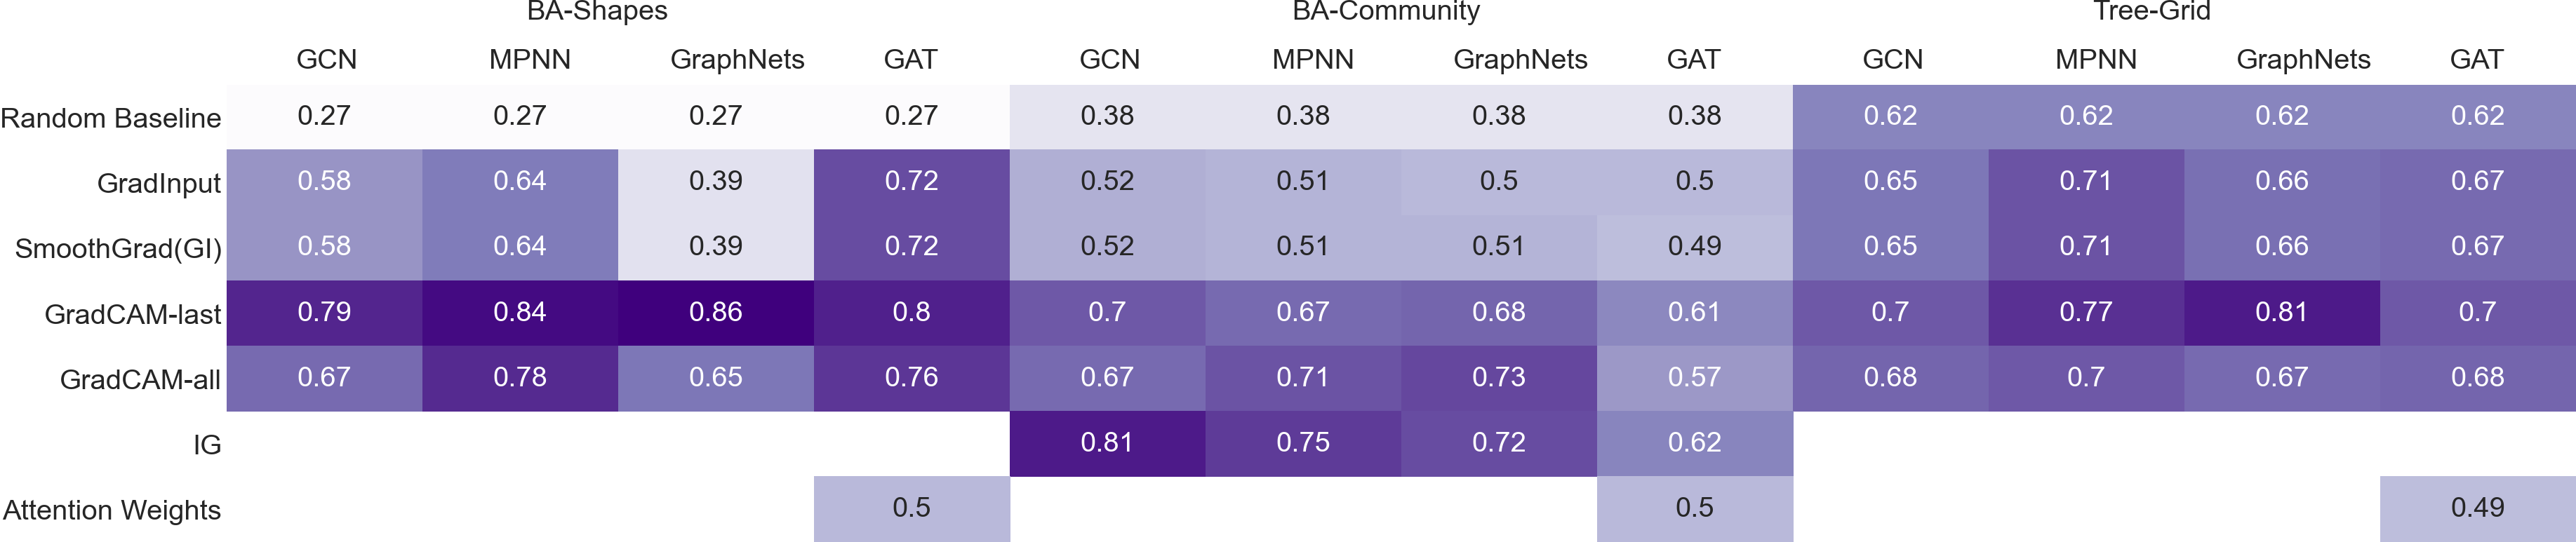

In [49]:
fig = plt.figure(figsize=(30, 6))
ax = sns.heatmap(dispdf, cmap='Purples', annot=True, ax=plt.gca(), cbar=False, mask=dispdf.isna())
ax.xaxis.tick_top()
ax.tick_params(length=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)

for i, t in enumerate(ax.get_xticklabels()):
  pos = t.get_position()
  text = t.get_text()
  task_models = text.split('-')
  model = task_models[-1]
  task = '-'.join(task_models[:-1])
  plt.text(i + 0.4 - len(model) * .015, -.25, model, fontsize=20)
  if i % 4 == 1:
    plt.text(i + 0.8 - len(task) * .03, -1, task, fontsize=20)

ax.set_xticklabels([]);
plt.xlabel('');

Table 3: 'Fluoride AND Carbonyl', 'Unbranched Alkane AND Carbonyl' 

In [50]:
table2_df = tabledf[tabledf['Task'].isin(['Fluoride AND Carbonyl', 'Unbranched Alkane AND Carbonyl'])]

In [51]:
dispdf = table2_df.pivot_table(
    index='Attribution Model',
    columns=('Task', 'Model'),
    values='Attribution Performance',
    aggfunc=lambda x: x)

dispdf = dispdf.reindex(columns=[get_nicename(n) for n in task_names], level='Task')\
               .reindex(columns=[get_nicename(m) for m in model_names], level='Model')\
               .reindex(index=[get_nicename(m) for m in ['Random'] + att_model_names])\
               .rename_axis(None)
dispdf

Task              Fluoride AND Carbonyl                        \
Model                               GCN  MPNN GraphNets   GAT   
Random Baseline                    0.42  0.42      0.42  0.43   
GradInput                          0.56  0.55      0.57  0.56   
SmoothGrad(GI)                     0.58  0.57      0.61  0.56   
GradCAM-last                       0.64  0.74      0.43  0.60   
GradCAM-all                        0.60  0.71      0.74  0.57   
IG                                 0.77  0.76      0.76  0.74   
CAM                                0.74  0.73      0.45  0.66   
Attention Weights                   NaN   NaN       NaN  0.53   

Task              Unbranched Alkane AND Carbonyl                        
Model                                        GCN  MPNN GraphNets   GAT  
Random Baseline                             0.50  0.50      0.50  0.50  
GradInput                                   0.56  0.55      0.59  0.52  
SmoothGrad(GI)                              0.55  0.56      0.60  0.42  
GradCAM-last                                0.64  0.93      0.57  0.55  
GradCAM-all                                 0.59  0.77      0.58  0.53  
IG                                          0.82  0.78      0.77  0.68  
CAM                                         0.91  0.97      0.65  0.84  
Attention Weights                            NaN   NaN       NaN  0.53

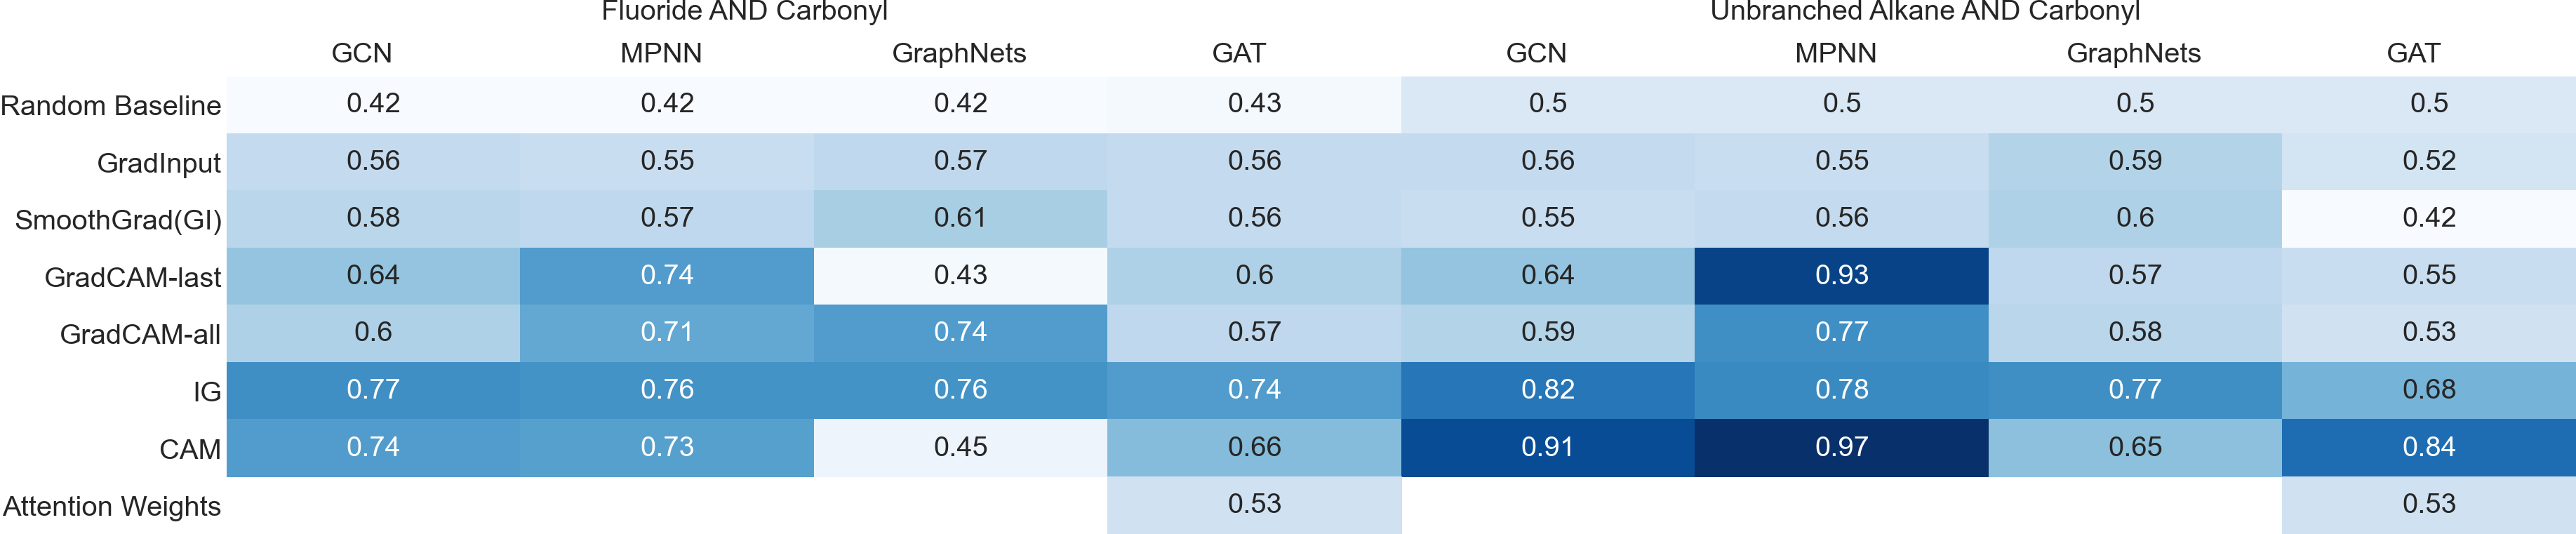

In [52]:
fig = plt.figure(figsize=(30, 6))
ax = sns.heatmap(dispdf, cmap='Blues', annot=True, ax=plt.gca(), cbar=False)
ax.xaxis.tick_top()
ax.tick_params(length=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)

for i, t in enumerate(ax.get_xticklabels()):
  pos = t.get_position()
  text = t.get_text()
  task_models = text.split('-')
  model = task_models[-1]
  task = '-'.join(task_models[:-1])
  plt.text(i + 0.4 - len(model) * .015, -.25, model, fontsize=20)
  if i % 4 == 1:
    plt.text(i + 0.8 - len(task) * .025, -1, task, fontsize=20)

ax.set_xticklabels([]);
plt.xlabel('');

# Figure 4: Noising labels to control model performance and measure attribution faithfulness.

In [53]:
path = os.path.join(csv_path, 'F4_labelnoise_raw.csv')
four_df_up = pd.read_csv(path)
four_df_up.head()

,batch_size,block_type,edge_size,epochs,global_size,l2_reg,learning_rate,n_layers,node_size,random_seed,...,ACC,Task,Technique,Model,ATT tau,ATT r,R2,RMSE,tau,r
0,256,gcn,20,100,100,0.00001,0.0003,3,50,42,...,1.0,benzene,CAM,gcn,NaN,NaN,NaN,NaN,NaN,NaN
1,256,gcn,20,100,100,0.00001,0.0003,3,50,42,...,1.0,benzene,GradInput,gcn,NaN,NaN,NaN,NaN,NaN,NaN
2,256,gcn,20,100,100,0.00001,0.0003,3,50,42,...,1.0,benzene,GradCAM-last,gcn,NaN,NaN,NaN,NaN,NaN,NaN
3,256,gcn,20,100,100,0.00001,0.0003,3,50,42,...,1.0,benzene,GradCAM-all,gcn,NaN,NaN,NaN,NaN,NaN,NaN
4,256,gcn,20,100,100,0.00001,0.0003,3,50,42,...,1.0,benzene,SmoothGrad(GradInput),gcn,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
path = os.path.join(csv_path, 'F4_labelnoise_summary.csv')
four_df_p = pd.read_csv(path)
four_df_p.head()

,task_type,Technique,block_type,random_seed,Kendall Tau
0,benzene,CAM,gcn,42,0.773303
1,benzene,GradInput,gcn,42,0.101266
2,benzene,GradCAM-last,gcn,42,0.653625
3,benzene,GradCAM-all,gcn,42,0.354431
4,benzene,SmoothGrad(GradInput),gcn,42,0.179517


Attribution vs task performance for CAM (filled dots) and GradInput (unfilled dots) in the GCN / benzene task pair. A single random seed run denotes a single experiment, and a total of 8 experiments are performed.

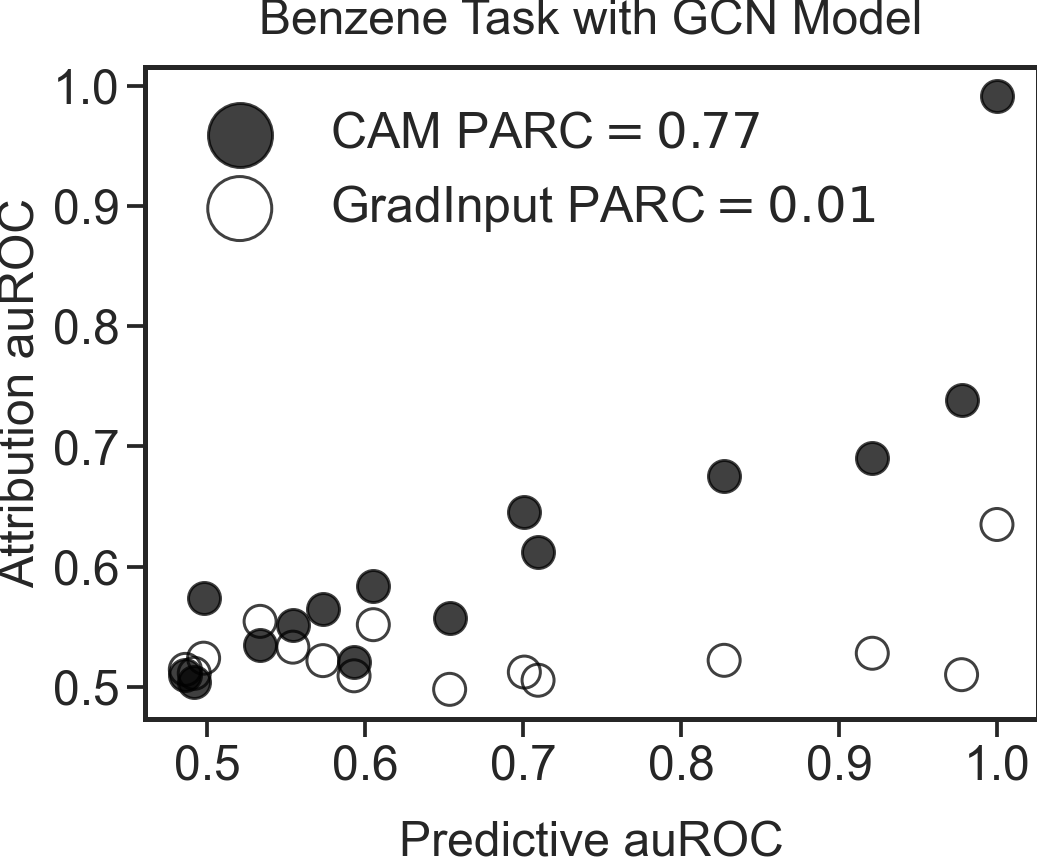

In [56]:
RANDOM_SEED = 49

plt.figure(figsize=(8, 6))
fig_attrs = [('benzene', 'gcn', 'CAM'),
             ('benzene', 'gcn', 'GradInput')]
marker_configs = [('o', 'k'), ('o', 'none')]
for c_idx, attr in enumerate(fig_attrs):
  # get nice names
  task_name, block_name, technique_name = attr
  title_task_name = get_nicename(task_name)
  title_block_name = get_nicename(block_name)
  title_technique_name = get_nicename(technique_name)

  # get performance names
  pred_key, att_key = task_to_att_key[task_name]
  
  # get the data
  tmp_df = four_df_up.query('Model=="{}" and task_type=="{}" and Technique=="{}" and random_seed=={}'.format(block_name, task_name, technique_name, RANDOM_SEED))

  # get the tau values
  tau_values = four_df_p.query('block_type=="{}" and task_type=="{}" and Technique=="{}" and random_seed=={}'.format(block_name, task_name, technique_name, RANDOM_SEED))['Kendall Tau']
  tau_mean = np.mean(tau_values)
  tau_str = 'PARC$={:.2f}$'.format(tau_mean)

  # drawing
  plt.scatter(tmp_df[pred_key],
              tmp_df[att_key],
              label='{} {}'.format(title_technique_name, tau_str),
              c=marker_configs[c_idx][1],
              marker=marker_configs[c_idx][0],
              s=256,
              edgecolors='k',
              alpha=0.75)

# setup label
plt.xlabel('Predictive {}'.format(' '.join(get_nicename(att_key).split()[1:])), fontsize=24, labelpad=16)
plt.ylabel('{}'.format(get_nicename(att_key)), fontsize=24)

# legend
plt.legend(loc=2, frameon=False, fontsize=25)
plt.title('{} Task with {} Model'.format(title_task_name, title_block_name), fontsize=24, pad=16)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

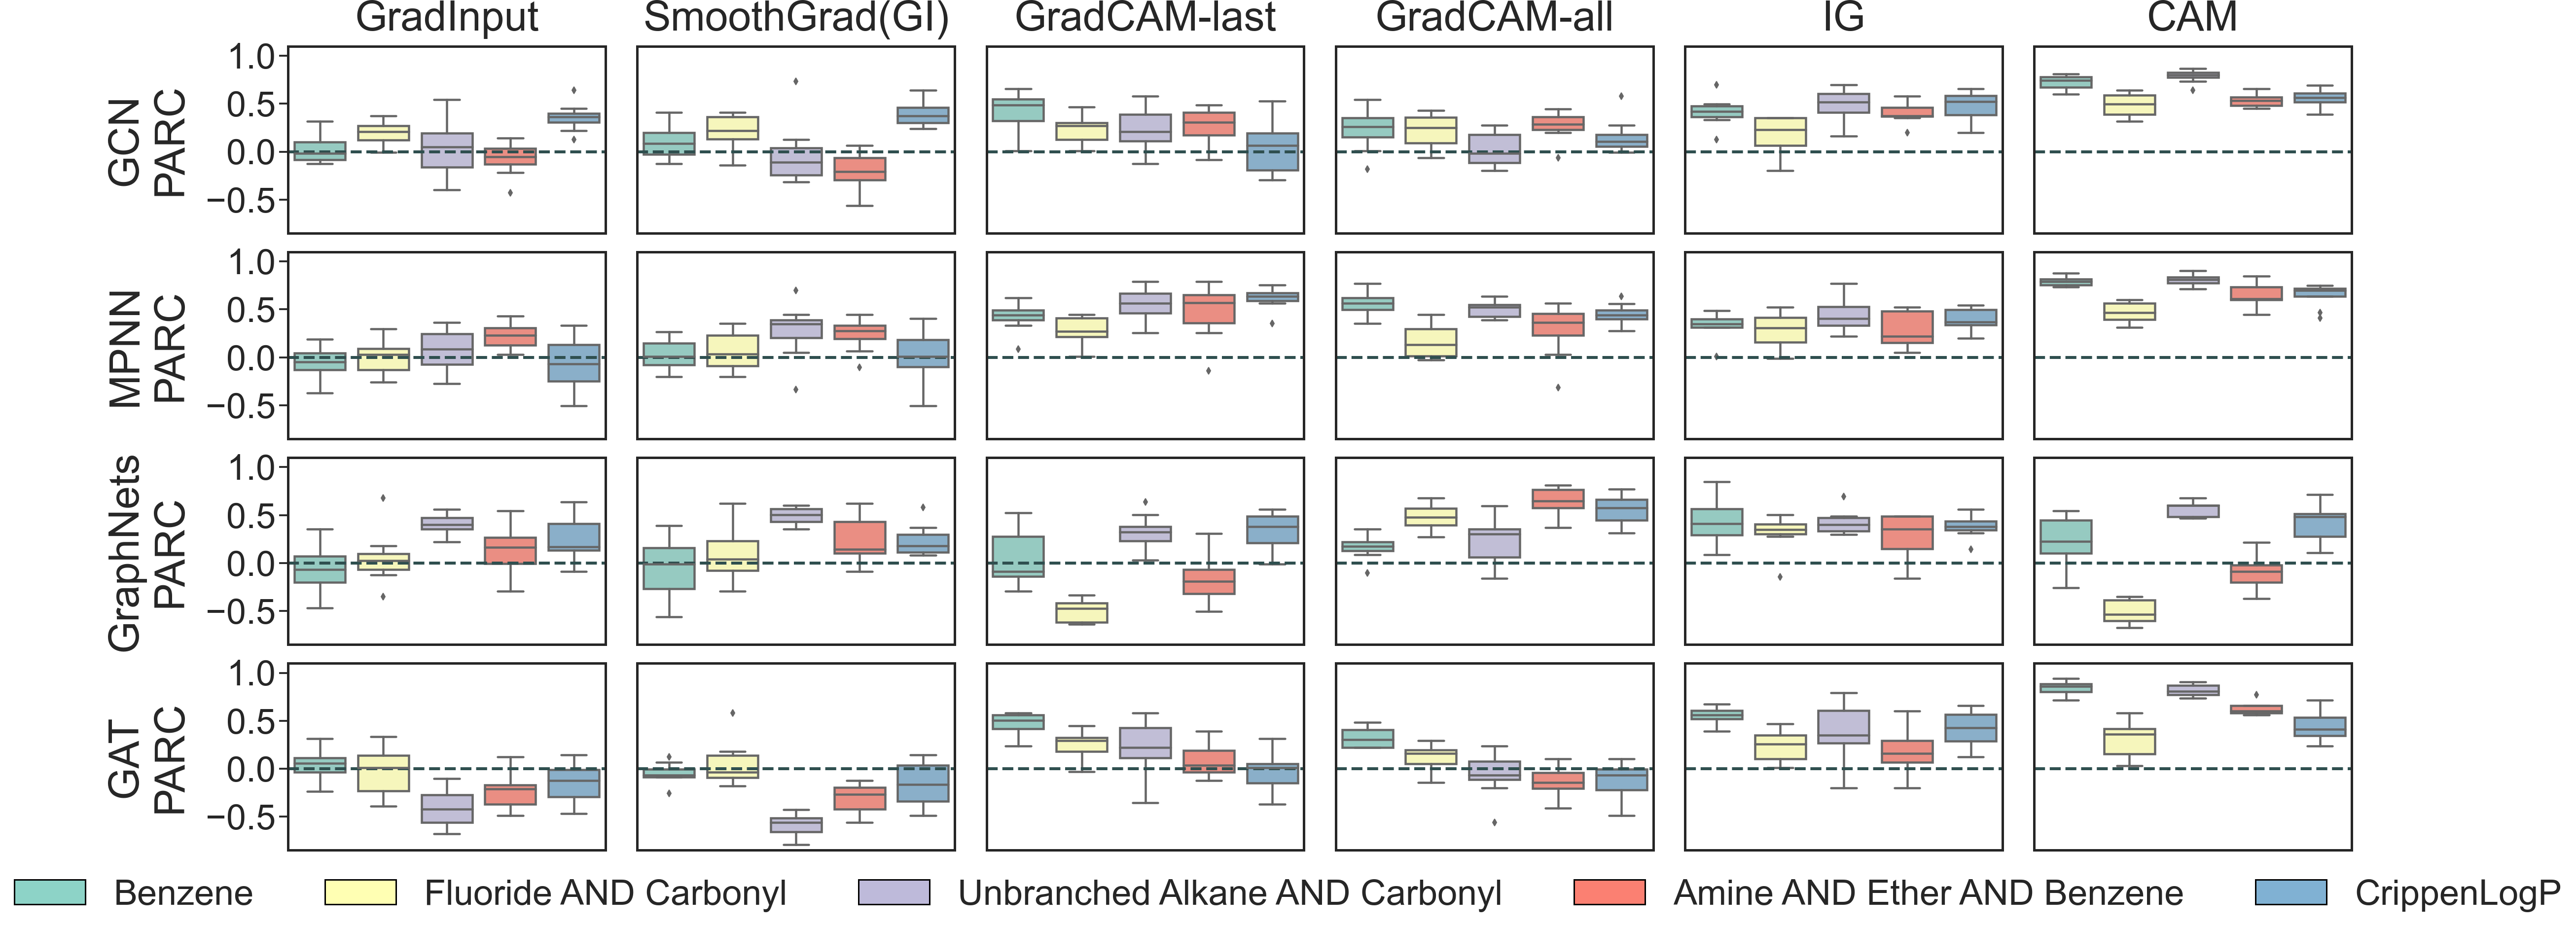

In [59]:
FIG_HEIGHT = 15
FIG_WIDTH_RATIO = 2.5
GRID_PADDING = 0.1
PALLETE = 'Set3'

fig_4_task_names = task_names[:-3]
fig_4_att_model_names = att_model_names[:-1]

fig, axes = plt.subplots(
    nrows=len(model_names),
    ncols=len(fig_4_att_model_names),
    figsize=(FIG_HEIGHT * FIG_WIDTH_RATIO, FIG_HEIGHT),
)
draw_legend_ax = None

for block_idx, block_name in enumerate(model_names):
  for tech_idx, technique_name in enumerate(fig_4_att_model_names):

    # get the dataframe
    tmp_df = four_df_p.query('Technique=="{}" and block_type=="{}"'.format(
        technique_name, block_name))

    # draw figures
    ax = plt.subplot(
        len(model_names), len(fig_4_att_model_names),
        1 + block_idx * len(fig_4_att_model_names) + tech_idx)
    sns.boxplot(
        x='task_type',
        y='Kendall Tau',
        data=tmp_df,
        palette=PALLETE,
        order=fig_4_task_names)
    plt.axhline(0, linestyle='--', color='darkslategray', linewidth=3)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks([], [])
    ax.set_yticks([-0.5, 0, 0.5, 1])
    plt.ylim(-0.85, 1.1)

    # setup grid
    if block_idx == 0:
      plt.title(get_nicename(technique_name), pad=16, fontsize=42)
    if tech_idx == 0:
      ax.set_ylabel(
          '{}\nPARC'.format(get_nicename(block_name)),
          labelpad=16,
          fontsize=42)
    if tech_idx != 0:
      plt.yticks([], [])
    else:
      ax.tick_params(axis='y', labelsize=36)
    if tech_idx == 2 and block_idx == len(model_names) - 1:
      draw_legend_ax = ax

# update the subplot spacing
plt.subplots_adjust(hspace=GRID_PADDING, wspace=GRID_PADDING)
# draw the legend
legend_elements = [
    patches.Patch(facecolor=c, edgecolor='k', label=get_nicename(t))
    for t, c in zip(
        fig_4_task_names,
        matplotlib.cm.get_cmap(PALLETE).colors[:len(fig_4_task_names)])
]
draw_legend_ax.legend(
    handles=legend_elements,
    ncol=len(fig_4_task_names),
    loc=8,
    fontsize=36,
    bbox_to_anchor=(0.95, -0.5),
    frameon=False)
plt.show()

# Figure 5: Evaluating faithfulness by handicapping a model with spurious correlations.

In [60]:
path = os.path.join(csv_path, 'F5_datasetbias_raw.csv')
five_df = pd.read_csv(path)
five_df.head()

,ab_mix_x,aug_percent,batch_size,block_type,edge_size,epochs,global_size,l2_reg,label_noise,learning_rate,...,ATT F1,ATT ACC,AUROC,F1,ACC,Task,Technique,Model,ab_mix_y,reg
0,1.0,0.0,256,gcn,20,300,100,0.00001,0.0,0.0003,...,0.311012,0.473767,0.899721,0.924386,0.893333,A,GradInput,gcn,1.0,True
1,1.0,0.0,256,gcn,20,300,100,0.00001,0.0,0.0003,...,0.298446,0.197149,0.899721,0.924386,0.893333,A,SmoothGrad(GradInput),gcn,1.0,True
2,1.0,0.0,256,gcn,20,300,100,0.00001,0.0,0.0003,...,0.327793,0.444916,0.899721,0.924386,0.893333,A,GradCAM-last,gcn,1.0,True
3,1.0,0.0,256,gcn,20,300,100,0.00001,0.0,0.0003,...,0.333441,0.450502,0.899721,0.924386,0.893333,A,GradCAM-all,gcn,1.0,True
4,1.0,0.0,256,gcn,20,300,100,0.00001,0.0,0.0003,...,0.441133,0.818518,0.899721,0.924386,0.893333,A,IG,gcn,1.0,True


In [61]:
path = os.path.join(csv_path, 'F5_datasetbias_summary.csv')
five_df_p = pd.read_csv(path)
five_df_p.head()

,Technique,Model,task_type,random_seed,parc
0,CAM,gcn,ester-benzene,42,0.353333
1,CAM,gcn,ester-benzene,43,0.640000
2,CAM,gcn,ester-benzene,44,0.460000
3,CAM,gcn,ester-benzene,45,0.253333
4,CAM,gcn,ester-benzene,46,0.720000


In [62]:
idx = (five_df.block_type == 'gcn') & \
      (five_df.task_type == 'piperdine-benzene') & \
      (five_df.Technique == 'CAM')
plot_df = five_df[idx]

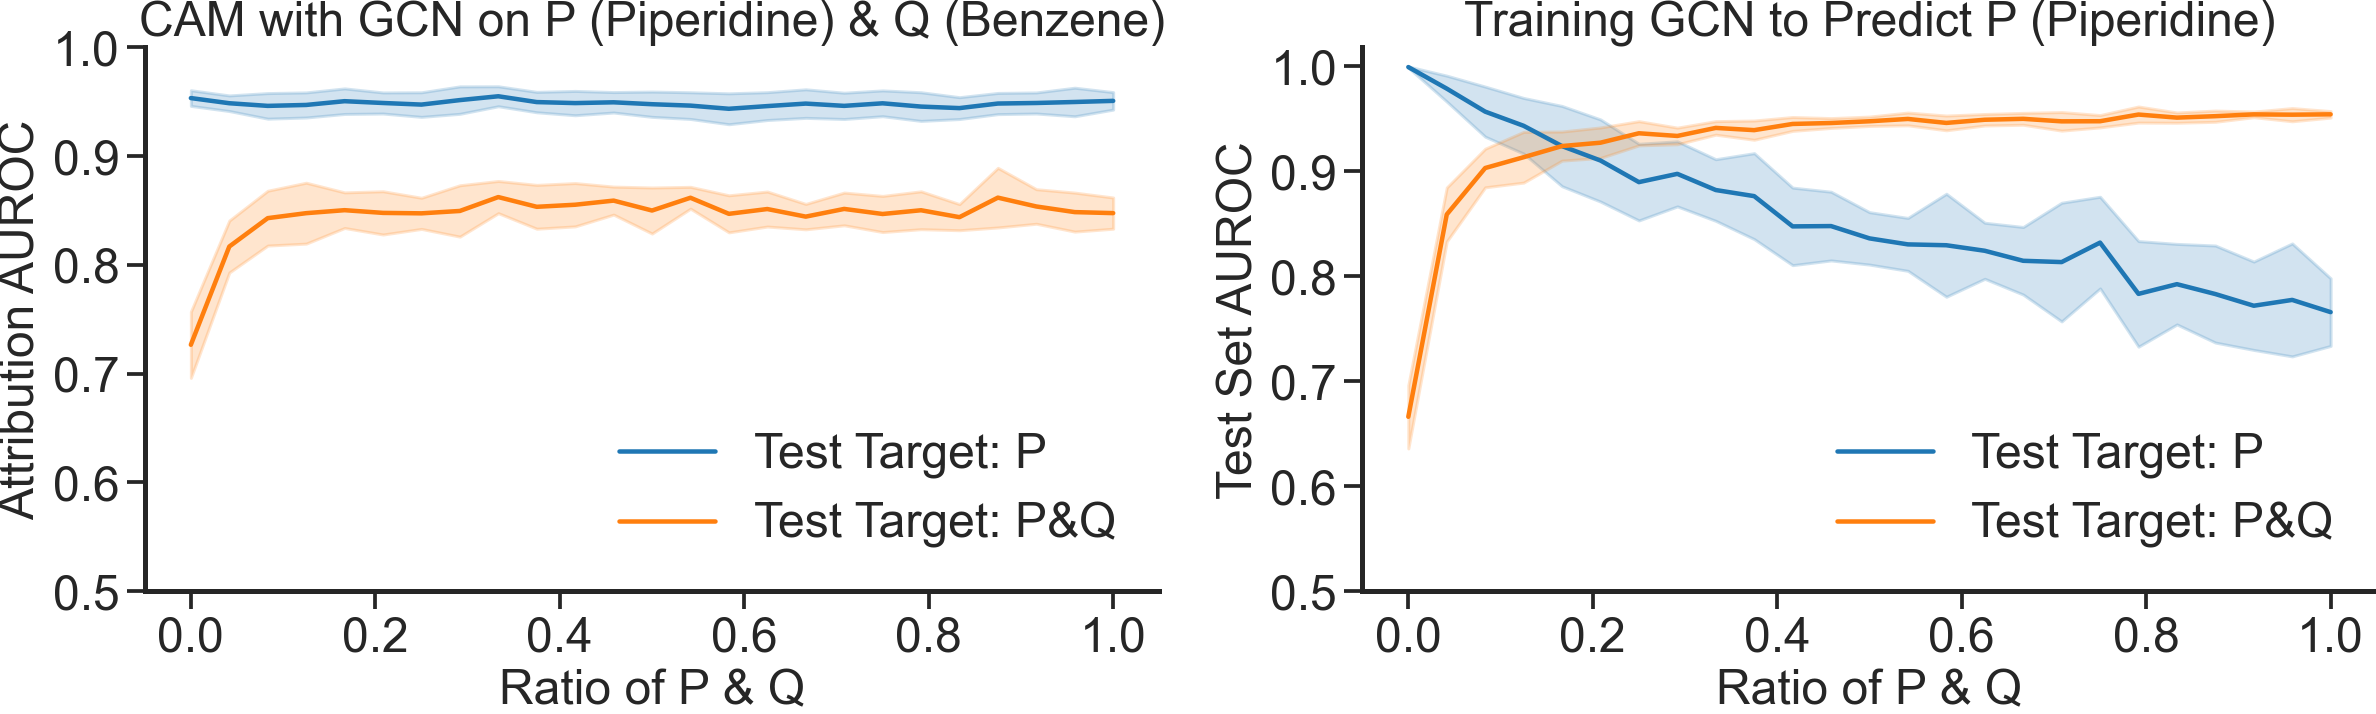

In [63]:
FIG_HEIGHT = 5
FIG_WIDTH_RATIO = 4
FS = 24
for key, tmp_df in plot_df.groupby(['Technique', 'Model', 'task_type']):
  tech_name, method_name, task_name = key
  method_name = get_nicename(method_name)
  plt.figure(figsize=(FIG_HEIGHT*FIG_WIDTH_RATIO, FIG_HEIGHT))
  for fig_idx, y_key in enumerate(['ATT AUROC','AUROC']):
    ax = plt.subplot(1, 2, fig_idx+1)
    viz_df = tmp_df.query('Task!="B"')
    sns.lineplot(x='ab_mix_x', y=y_key, hue='Task', data=viz_df, ci='sd')
    if fig_idx == 0:
      plt.title('{} with {} on P ({}) & Q ({})'.format(tech_name, method_name, 'Piperidine', 'Benzene'), fontsize=FS)
      plt.ylabel('Attribution AUROC', fontsize=FS)
    if fig_idx == 1:
      plt.title('Training {} to Predict P ({})'.format(method_name, 'Piperidine'), fontsize=FS)
      plt.ylabel('Test Set AUROC', fontsize=FS)
    plt.xlabel('Ratio of P & Q', fontsize=FS)
    ax.tick_params(axis='y', labelsize=FS)
    ax.tick_params(axis='x', labelsize=FS)
    plt.yticks(np.arange(0.5, 1.01, 0.1))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=['Test Target: P', 'Test Target: P&Q'], loc=4, fontsize=FS, frameon=False)
    sns.despine()

In [64]:
def edit_task_name(task_name):
  if 'unbrch':
    task_name = task_name.replace('unbrch', 'unbranched')
  task_name = task_name.replace('-', ' & ')
  task_name = task_name.replace('_',' ')
  return task_name.title()

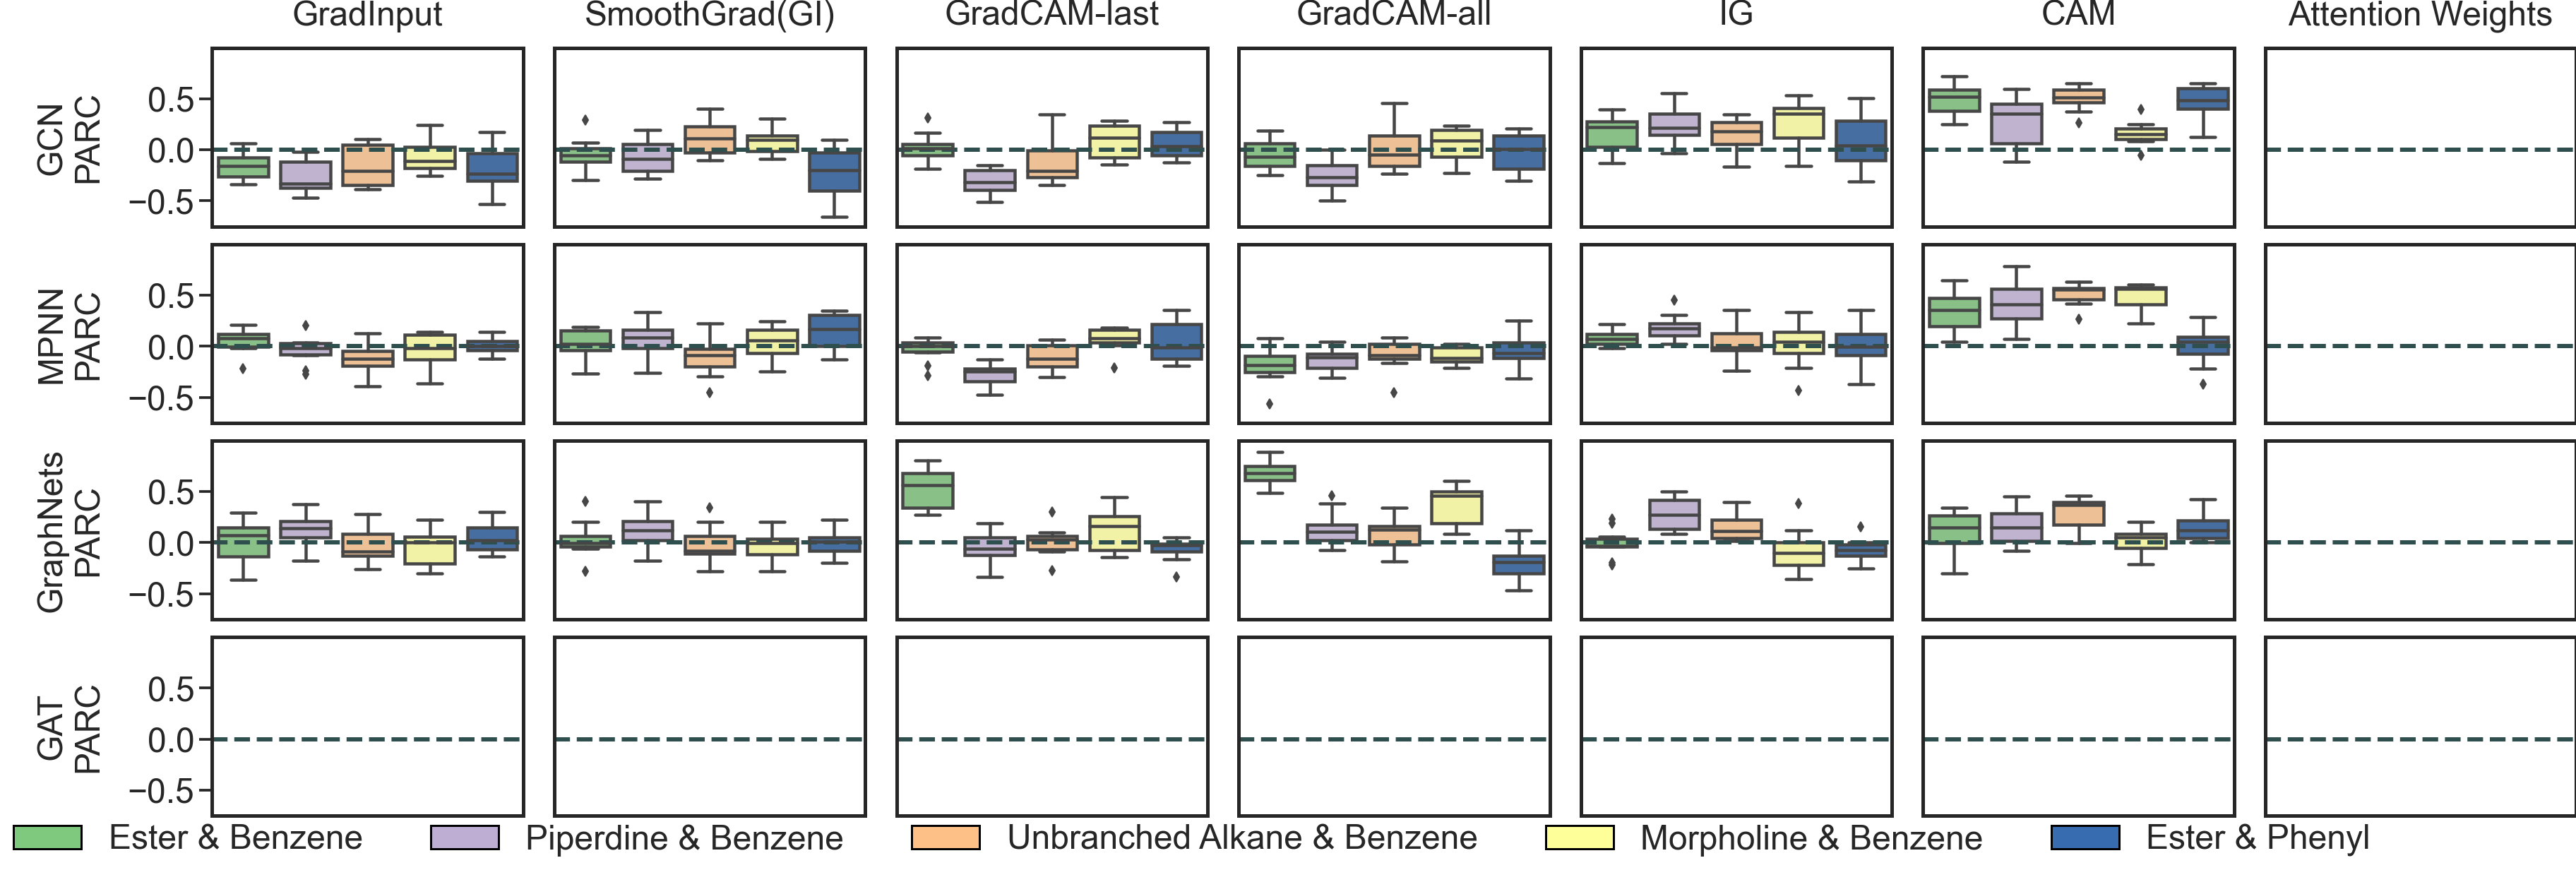

In [66]:
FIG_HEIGHT = 10
FIG_WIDTH_RATIO = 3
GRID_PADDING = 0.1
FS = 24
PALLETE = 'Accent'
BIAS_TASK_NAMES = ['ester-benzene', 'piperdine-benzene','unbrch_alkane-benzene','morpholine-benzene', 'ester-phenyl']

fig, axes = plt.subplots(nrows=len(model_names), ncols=len(att_model_names), figsize=(FIG_HEIGHT*FIG_WIDTH_RATIO, FIG_HEIGHT))
for block_idx, block_name in enumerate(model_names):
  for tech_idx, technique_name in enumerate(att_model_names):
    # get the dataframe
    tmp_df = five_df_p.query('Technique=="{}" and Model=="{}"'.format(technique_name, block_name))

    # draw figures
    ax = plt.subplot(len(model_names), len(att_model_names), 1 + block_idx * len(att_model_names) + tech_idx)
    sns.boxplot(x='task_type', y='parc', data=tmp_df, palette=PALLETE, order=BIAS_TASK_NAMES)
    plt.axhline(0, linestyle='--', color='darkslategray', linewidth=3)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks([], [])
    ax.set_yticks([-0.5, 0, 0.5])
    plt.ylim(-0.75, 1)

    # setup grid
    if block_idx == 0:
      plt.title(get_nicename(technique_name), pad=16, fontsize=FS)
    if tech_idx == 0:
      ax.set_ylabel('{}\nPARC'.format(get_nicename(block_name)), labelpad=16, fontsize=FS)
    if tech_idx != 0:
      plt.yticks([], [])
    else:
      ax.tick_params(axis='y', labelsize=FS)
    if tech_idx == 2 and block_idx == len(model_names)-1:
      draw_legend_ax = ax

# udpate the subplot spacing
plt.subplots_adjust(hspace=GRID_PADDING, wspace=GRID_PADDING)
legend_elements = [patches.Patch(facecolor=c, edgecolor='k',label=edit_task_name(t)) for t, c in zip(BIAS_TASK_NAMES, matplotlib.cm.get_cmap(PALLETE).colors[:len(BIAS_TASK_NAMES)])]
draw_legend_ax.legend(handles=legend_elements, ncol=len(BIAS_TASK_NAMES), loc=8, fontsize=FS, bbox_to_anchor=(0.95, -0.4), frameon=False)
plt.show()

# Figure 6: Attribution stability as measured by change in attribution accuracy on perturbed input graphs.

In [67]:
path = os.path.join(csv_path, 'F6_molperturb_summary.csv')
six_df = pd.read_csv(path)
six_df.head()

,Model,Attribution Technique,task_type,del(AttAUROC)
0,gcn,Random,logic7,0.341688
1,gcn,Random,logic7,0.087719
2,gcn,Random,logic7,0.143275
3,gcn,Random,logic7,0.198830
4,gcn,Random,logic7,0.271053


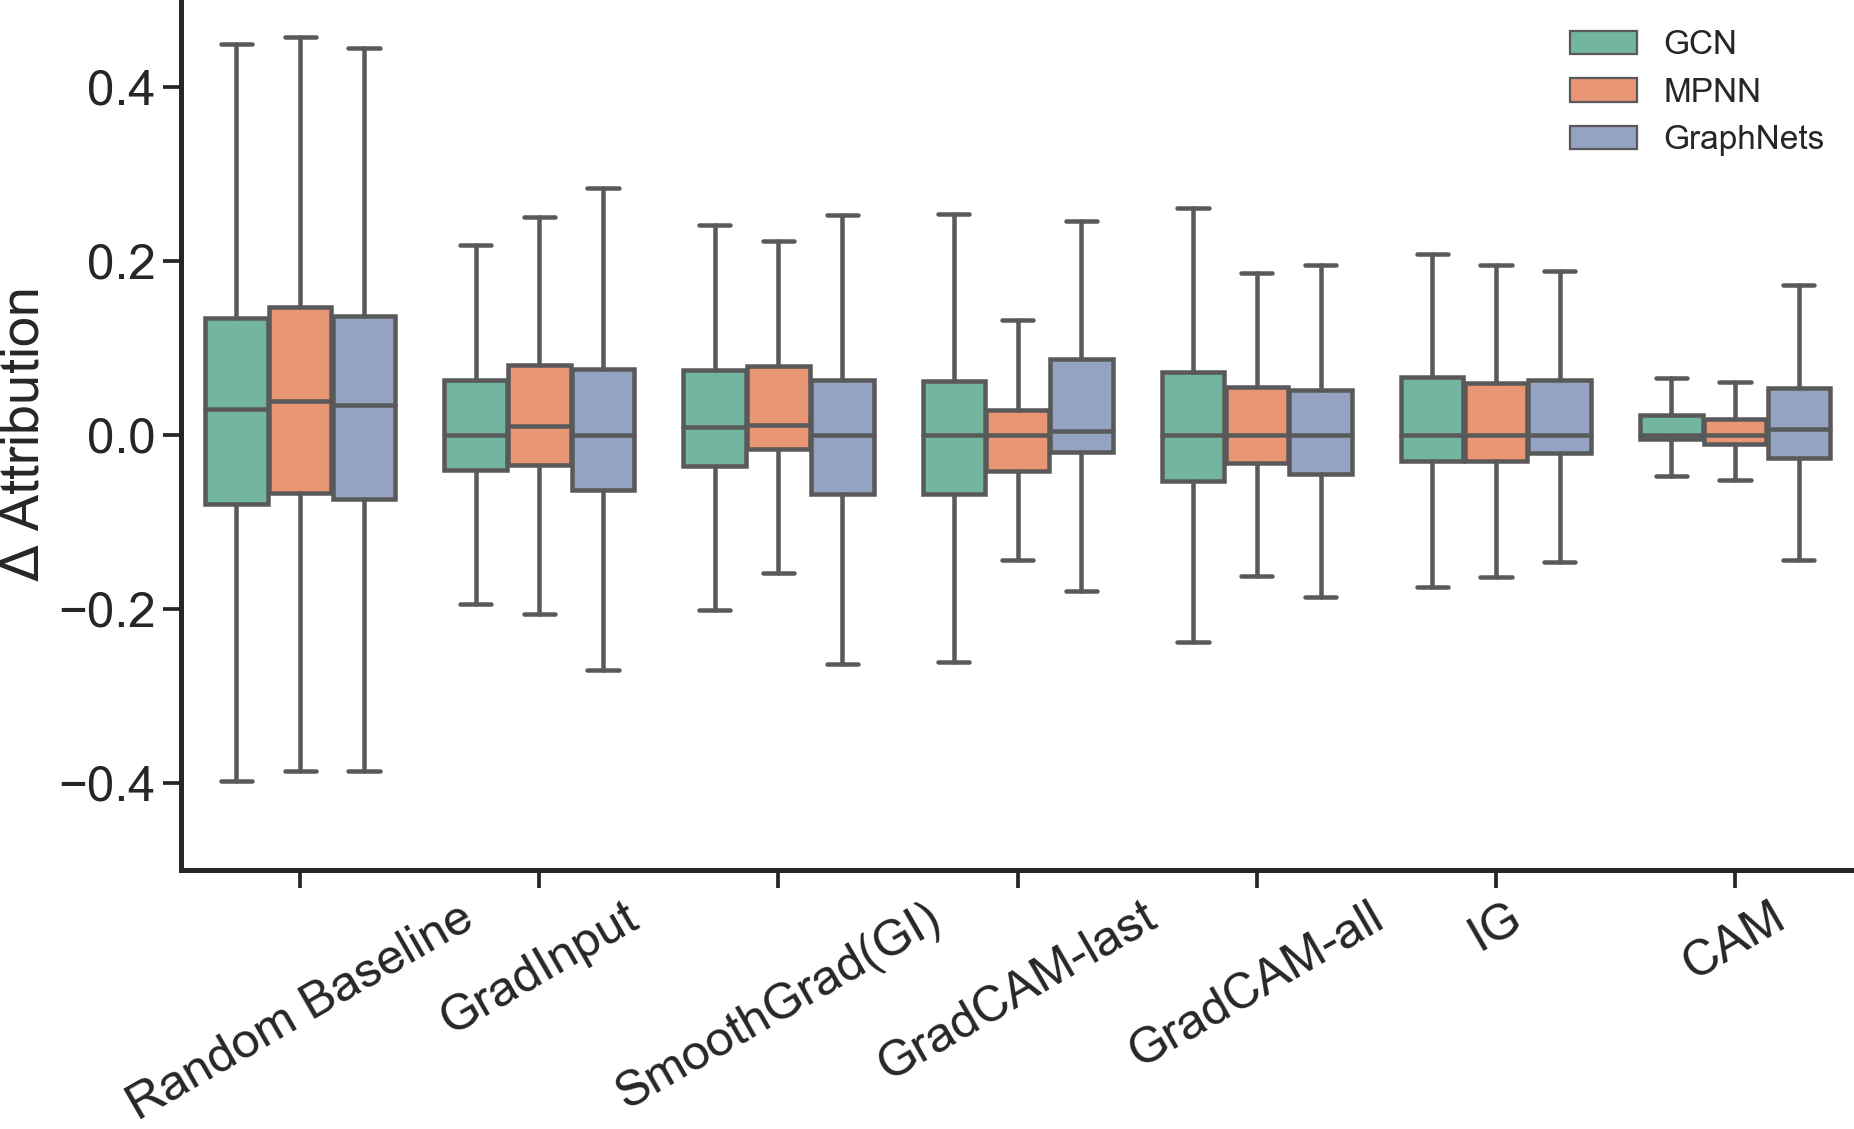

In [74]:
def plot_attribution_result_concat_over_tasks(result_df):
  plt.figure(figsize=(15, 8))
  sns.boxplot(x='Attribution Technique', y='del(AttAUROC)', hue='Model', data=result_df, palette='Set2', showfliers=False)
  label_nicenames(plt.gca())
  plt.xlabel('')
  plt.ylim(-0.5, 0.5)
  plt.ylabel(r'$\Delta$ Attribution')
  sns.despine()
  ax = plt.gca()
  ax.tick_params(axis='x')
  plt.xticks(rotation=30)
  plot_nice_legend(plt.gca())

plot_attribution_result_concat_over_tasks(six_df)